In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from joblib import Parallel, delayed
#import umap
import pandas as pd

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir

In [4]:
DATASET_ID = 'bengalese_finch_sober'

In [5]:
from avgn.utils.hparams import HParams
from avgn.dataset import DataSet

In [6]:
from avgn.signalprocessing.create_spectrogram_dataset import prepare_wav, create_label_df, get_row_audio

### create dataset

In [7]:
hparams = HParams(
    num_mel_bins = 32,
    mel_lower_edge_hertz=500,
    mel_upper_edge_hertz=15000,
    butter_lowcut = 500,
    butter_highcut = 15000,
    ref_level_db = 20,
    min_level_db = -25,
    mask_spec = True,
    win_length_ms = 10,
    hop_length_ms = 2,
    nex=-1,
    n_jobs=-1,
    verbosity = 1,
)

In [8]:
# create a dataset object
dataset = DataSet(DATASET_ID, hparams = hparams)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 167 tasks      | elapsed:    5.6s


[Parallel(n_jobs=-1)]: Done 2663 out of 2663 | elapsed:    5.9s finished


/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3

In [9]:
dataset.sample_json

OrderedDict([('species', 'Lonchura striata domestica'),
             ('common_name', 'Bengalese finch'),
             ('indvs',
              OrderedDict([('gr41rd51',
                            OrderedDict([('syllables',
                                          OrderedDict([('start_times',
                                                        [1.05825,
                                                         2.0581875,
                                                         2.2345,
                                                         2.43575,
                                                         2.597875,
                                                         2.79425,
                                                         2.95409375,
                                                         3.12025,
                                                         3.27378125,
                                                         3.45621875,
                                   

In [10]:
len(dataset.data_files)

2663

#### Create dataset based upon JSON

In [11]:
from joblib import Parallel, delayed
n_jobs = -1; verbosity = 10

In [12]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    syllable_dfs = parallel(
        delayed(create_label_df)(
            dataset.data_files[key].data,
            hparams=dataset.hparams,
            labels_to_retain=['labels'],
            unit="syllables",
            dict_features_to_retain = [],
            key = key,
        )
        for key in tqdm(dataset.data_files.keys())
    )
syllable_df = pd.concat(syllable_dfs)
len(syllable_df)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1957s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 117 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1923s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 207 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 253 tasks      | elapsed:    1.8s
[Parallel(n_j

[Parallel(n_jobs=-1)]: Done 2663 out of 2663 | elapsed:    5.5s finished


215663

In [13]:
syllable_df[:3]

start_time  end_time labels      indv  indvi  \
0    1.058250  1.089219      i  gr41rd51      0   
1    2.058187  2.117165      i  gr41rd51      0   
2    2.234500  2.285938      i  gr41rd51      0   

                                                 key  
0  gr41rd51__3part_SYLc_th4191_belowhits_220612_1...  
1  gr41rd51__3part_SYLc_th4191_belowhits_220612_1...  
2  gr41rd51__3part_SYLc_th4191_belowhits_220612_1...

In [40]:
1024/32000

0.032

In [41]:
2000/32000

0.0625

In [ ]:
syllable_df.start_time = 0.15

### get audio for dataset

In [14]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    syllable_dfs = parallel(
        delayed(get_row_audio)(
            syllable_df[syllable_df.key == key], 
            dataset.data_files[key].data['wav_loc'], 
            dataset.hparams
        )
        for key in tqdm(syllable_df.key.unique())
    )
syllable_df = pd.concat(syllable_dfs)
len(syllable_df)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0629s.) Setting batch_size=6.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 106 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 628 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 730 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 832 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 946 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 1060 t

[Parallel(n_jobs=-1)]: Done 2663 out of 2663 | elapsed:   37.3s finished


215663

In [15]:
df_mask  = np.array([len(i) > 0 for i in tqdm(syllable_df.audio.values)])

In [16]:
syllable_df = syllable_df[np.array(df_mask)]

In [17]:
syllable_df[:3]

start_time  end_time labels      indv  indvi  \
0    1.058250  1.089219      i  gr41rd51      0   
1    2.058187  2.117165      i  gr41rd51      0   
2    2.234500  2.285938      i  gr41rd51      0   

                                                 key  \
0  gr41rd51__3part_SYLc_th4191_belowhits_220612_1...   
1  gr41rd51__3part_SYLc_th4191_belowhits_220612_1...   
2  gr41rd51__3part_SYLc_th4191_belowhits_220612_1...   

                                               audio   rate  
0  [0.007913239, 0.0037091146, -0.012997307, 0.00...  32000  
1  [0.00014151214, 0.012034456, 0.0034554466, 0.0...  32000  
2  [0.004948442, 0.0035751169, 0.0026654594, 0.00...  32000

In [18]:
sylls = syllable_df.audio.values

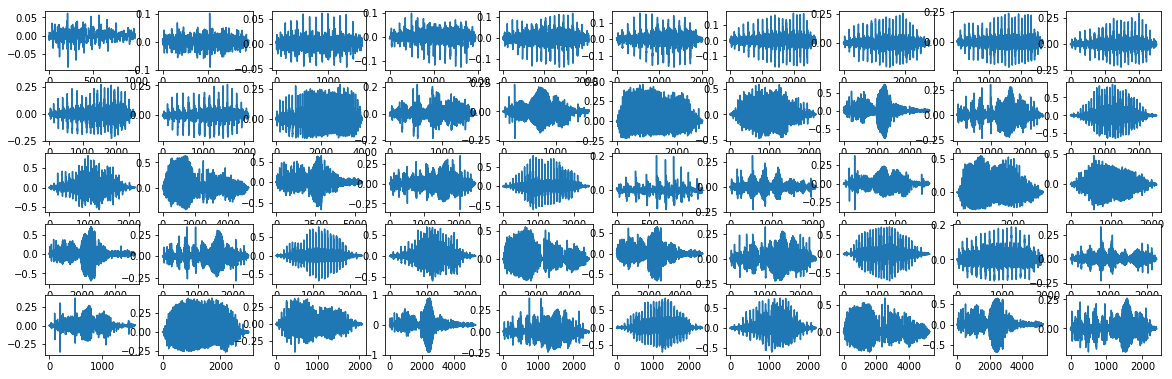

In [19]:
nrows = 5
ncols = 10
zoom = 2
fig, axs = plt.subplots(ncols=ncols, nrows = nrows,figsize = (ncols*zoom, nrows+zoom/1.5))
for i, syll in tqdm(enumerate(sylls), total = nrows*ncols):
    ax = axs.flatten()[i]
    ax.plot(syll)
    if i == nrows*ncols -1:
        break

In [20]:
syllable_df['audio'] = [i/np.max(i) for i in syllable_df.audio.values]

### Create spectrograms

In [21]:
from avgn.visualization.spectrogram import draw_spec_set
from avgn.signalprocessing.create_spectrogram_dataset import make_spec, mask_spec, log_resize_spec, pad_spectrogram

In [22]:
syllables_wav = syllable_df.audio.values
syllables_rate = syllable_df.rate.values

In [23]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    # create spectrograms
    syllables_spec = parallel(
        delayed(make_spec)(
            syllable,
            rate,
            hparams=dataset.hparams,
            mel_matrix=dataset.mel_matrix,
            use_mel=True,
            use_tensorflow=False,
        )
        for syllable, rate in tqdm(
            zip(syllables_wav, syllables_rate),
            total=len(syllables_rate),
            desc="getting syllable spectrograms",
            leave=False,
        )
    )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0313s.) Setting batch_size=12.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1232s.) Setting batch_size=38.
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 472 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 700 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1934 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 2732 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 3606 tasks      | elapsed:    1.4s
[Parall

[Parallel(n_jobs=-1)]: Done 215663 out of 215663 | elapsed:   32.8s finished


### Rescale spectrogram
- using log rescaling

In [24]:
log_scaling_factor = 4

In [25]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    syllables_spec = parallel(
        delayed(log_resize_spec)(spec, scaling_factor=log_scaling_factor)
        for spec in tqdm(syllables_spec, desc="scaling spectrograms", leave=False)
    )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0071s.) Setting batch_size=56.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0562s.) Setting batch_size=398.
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1750 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 6924 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 12098 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 18068 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 24038 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 30804 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 37570 tasks      | elapsed:    3.2

[Parallel(n_jobs=-1)]: Done 215663 out of 215663 | elapsed:   17.1s finished


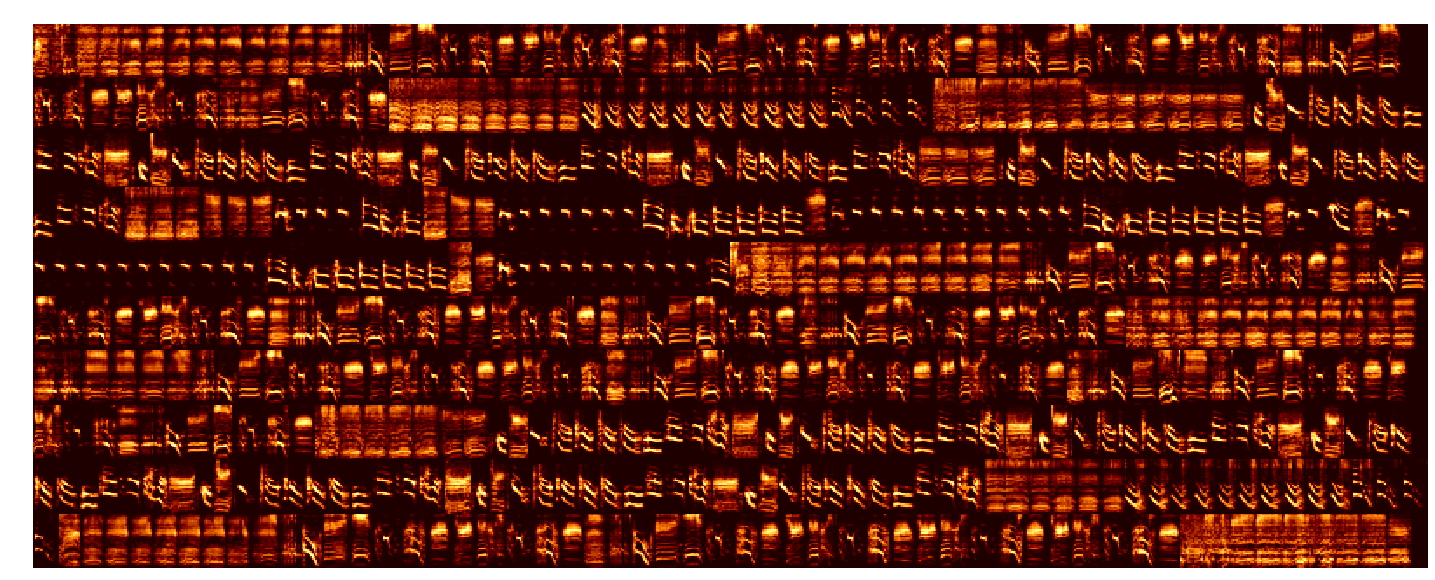

In [26]:
draw_spec_set(syllables_spec, zoom=1, maxrows=10, colsize=25)

### Pad spectrograms

In [27]:
syll_lens = [np.shape(i)[1] for i in syllables_spec]
pad_length = np.max(syll_lens)

In [28]:
syllable_df[:3]

start_time  end_time labels      indv  indvi  \
0    1.058250  1.089219      i  gr41rd51      0   
1    2.058187  2.117165      i  gr41rd51      0   
2    2.234500  2.285938      i  gr41rd51      0   

                                                 key  \
0  gr41rd51__3part_SYLc_th4191_belowhits_220612_1...   
1  gr41rd51__3part_SYLc_th4191_belowhits_220612_1...   
2  gr41rd51__3part_SYLc_th4191_belowhits_220612_1...   

                                               audio   rate  
0  [0.12828393, 0.060129583, -0.21070328, 0.00274...  32000  
1  [0.0013724383, 0.11671471, 0.033512227, 0.0607...  32000  
2  [0.07955982, 0.05747984, 0.042854592, 0.059728...  32000

In [29]:
import seaborn as sns

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


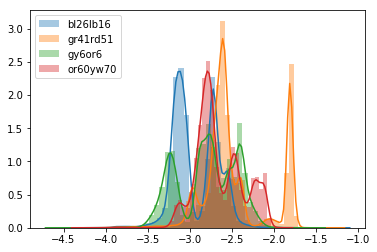

In [30]:
for indv in np.unique(syllable_df.indv):
    sns.distplot(np.log(syllable_df[syllable_df.indv==indv]["end_time"] - syllable_df[syllable_df.indv==indv]["start_time"]), label=indv)
plt.legend()

In [31]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:

    syllables_spec = parallel(
        delayed(pad_spectrogram)(spec, pad_length)
        for spec in tqdm(
            syllables_spec, desc="padding spectrograms", leave=False
        )
    )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0324s.) Setting batch_size=12.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0831s.) Setting batch_size=56.
[Parallel(n_jobs=-1)]: Done  75 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 472 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 700 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1588 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 2764 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 3940 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 5228 tasks      | elapsed:    0.8s
[Parall

[Parallel(n_jobs=-1)]: Done 215663 out of 215663 | elapsed:   19.6s finished


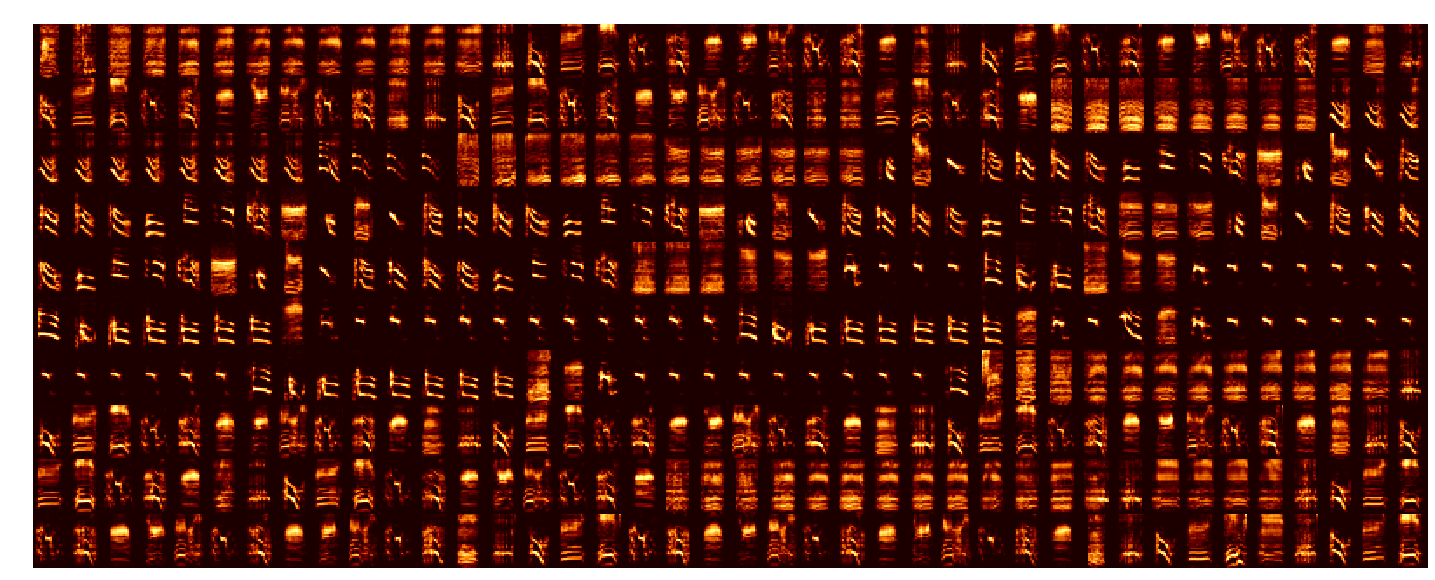

In [32]:
draw_spec_set(syllables_spec, zoom=1, maxrows=10, colsize=25)

In [33]:
np.shape(syllables_spec)

(215663, 32, 20)

In [34]:
def norm(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))
syllables_spec = [(norm(i)*255).astype('uint8') for i in tqdm(syllables_spec)]

In [35]:
# convert to uint8 to save space
syllable_df['spectrogram'] = syllables_spec

In [36]:
syllable_df[:3]

start_time  end_time labels      indv  indvi  \
0    1.058250  1.089219      i  gr41rd51      0   
1    2.058187  2.117165      i  gr41rd51      0   
2    2.234500  2.285938      i  gr41rd51      0   

                                                 key  \
0  gr41rd51__3part_SYLc_th4191_belowhits_220612_1...   
1  gr41rd51__3part_SYLc_th4191_belowhits_220612_1...   
2  gr41rd51__3part_SYLc_th4191_belowhits_220612_1...   

                                               audio   rate  \
0  [0.12828393, 0.060129583, -0.21070328, 0.00274...  32000   
1  [0.0013724383, 0.11671471, 0.033512227, 0.0607...  32000   
2  [0.07955982, 0.05747984, 0.042854592, 0.059728...  32000   

                                         spectrogram  
0  [[5, 5, 5, 5, 3, 25, 26, 75, 105, 80, 47, 16, ...  
1  [[4, 4, 4, 4, 16, 8, 6, 11, 7, 3, 3, 14, 51, 2...  
2  [[2, 2, 2, 3, 0, 26, 49, 12, 9, 2, 2, 93, 68, ...

### view syllables per indv

In [37]:
syllable_df.indv.unique()

array(['gr41rd51', 'or60yw70', 'gy6or6', 'bl26lb16'], dtype=object)

bl26lb16 70701


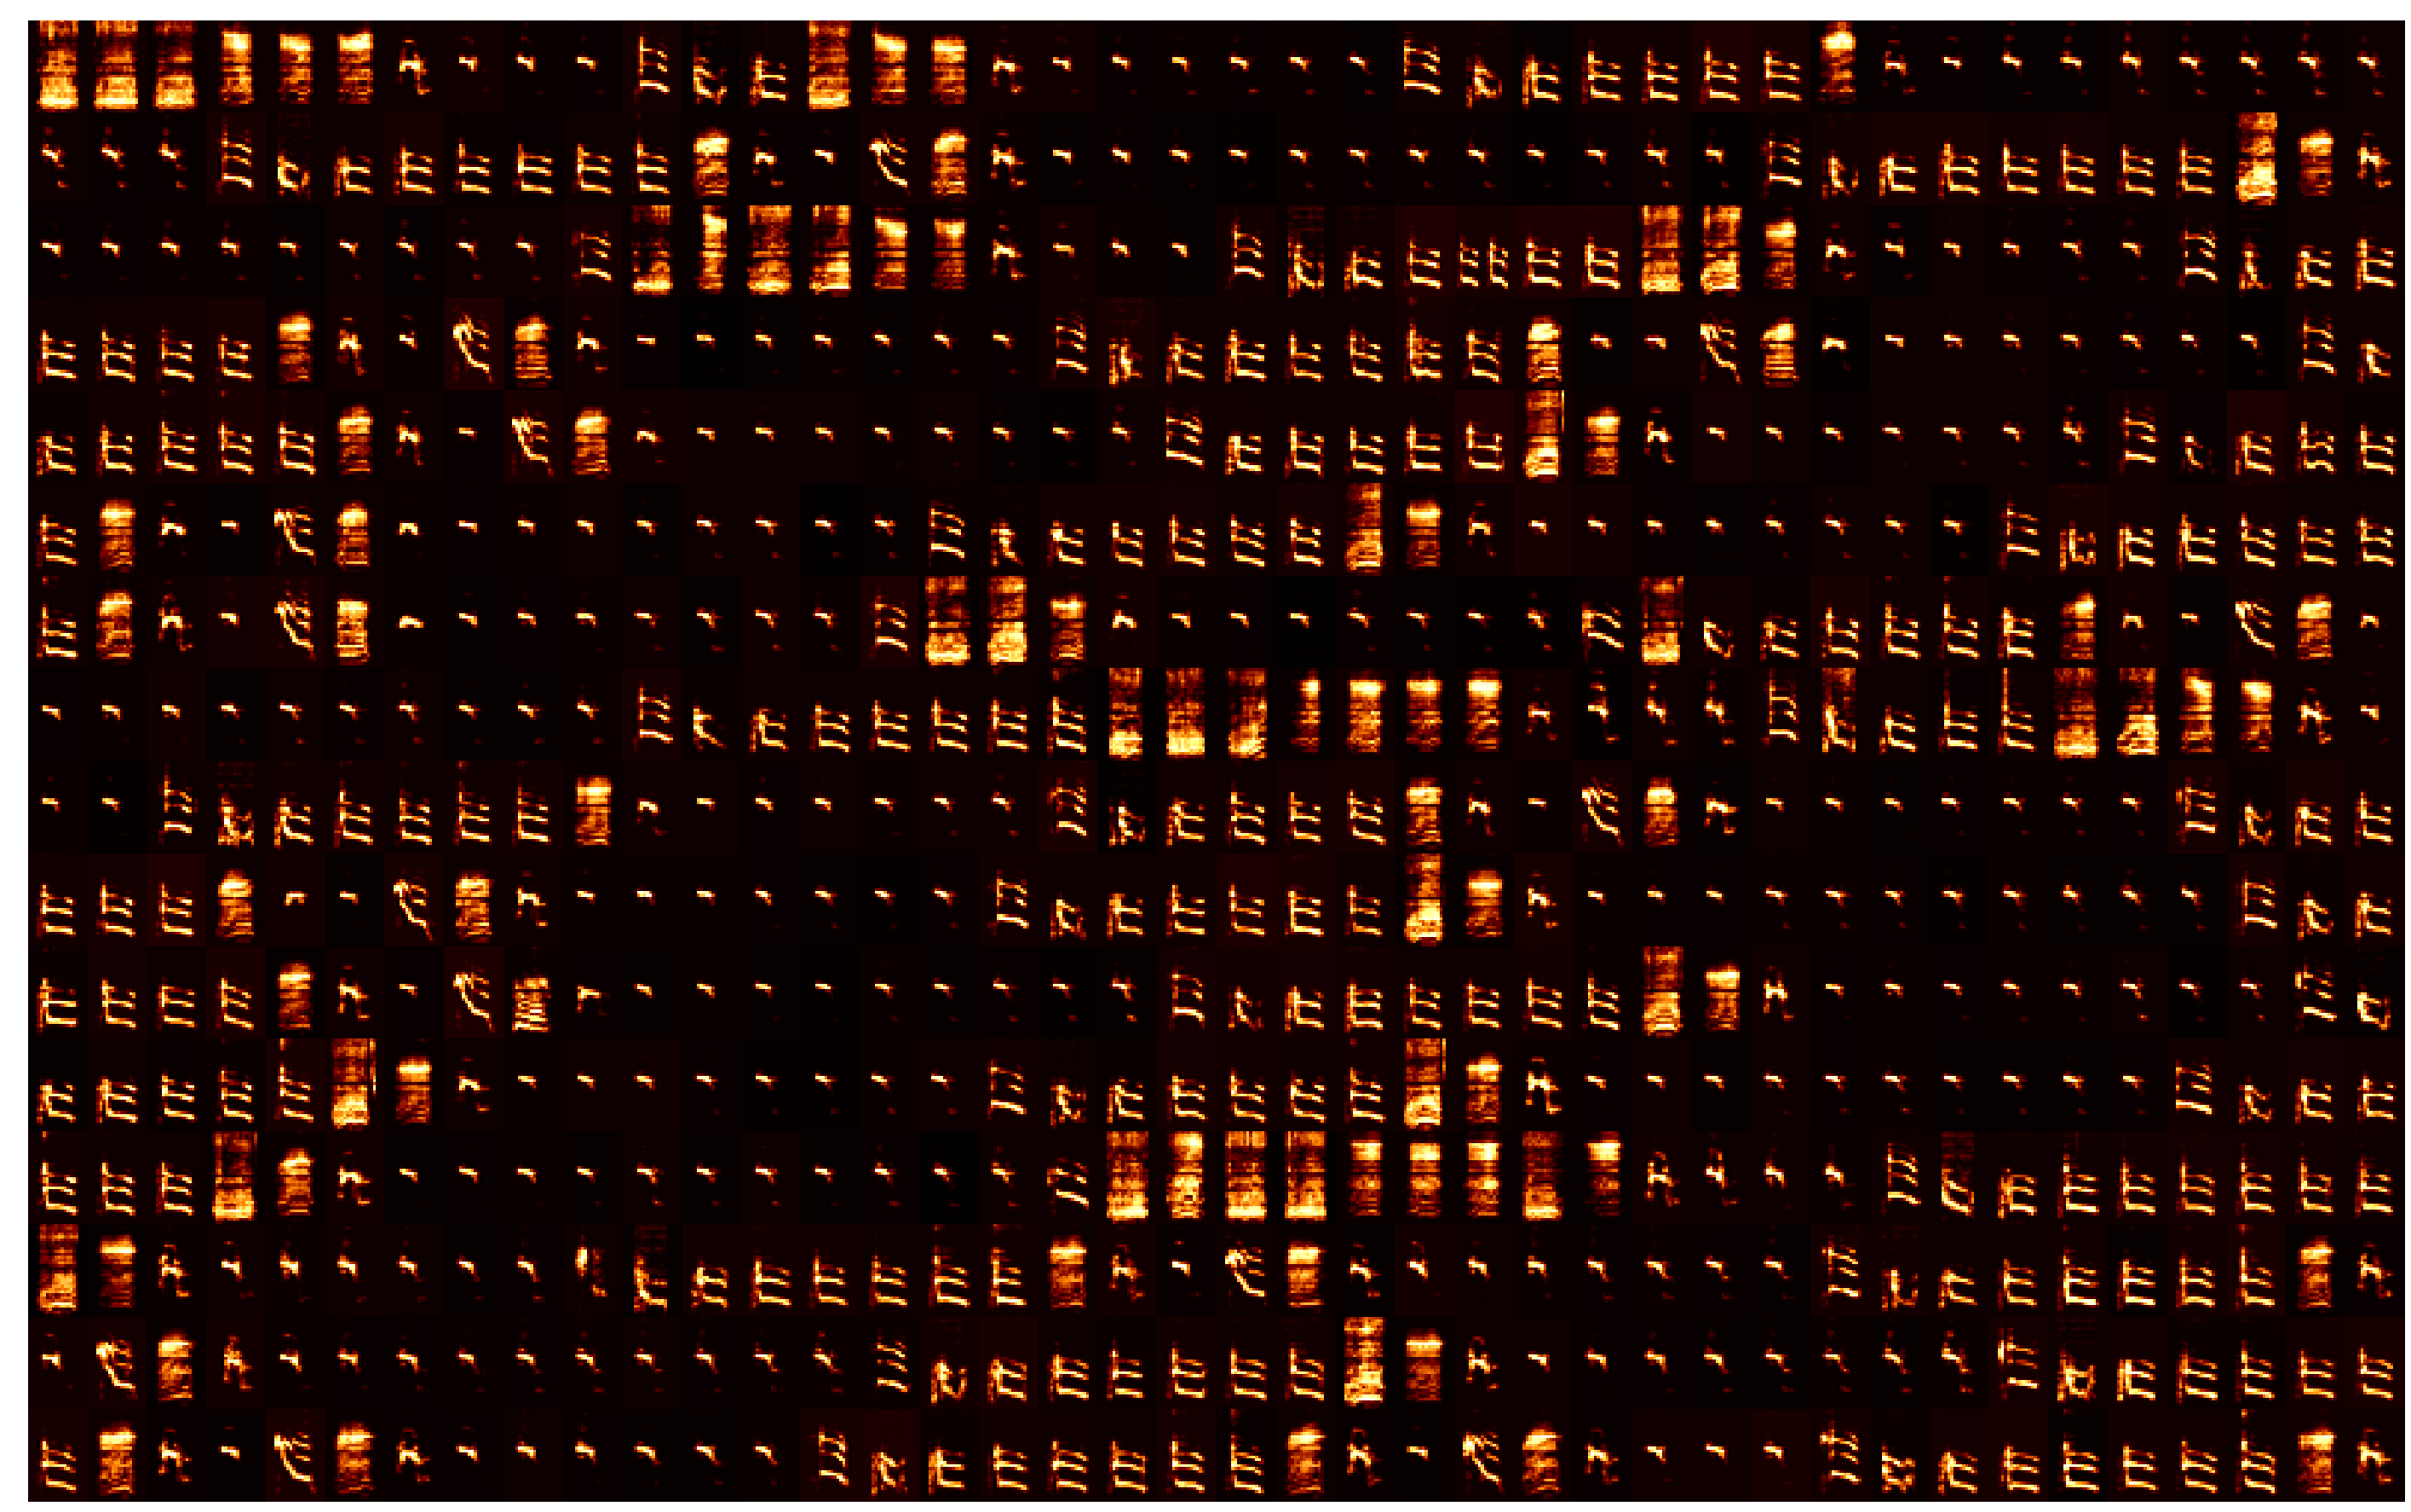

gr41rd51 52788


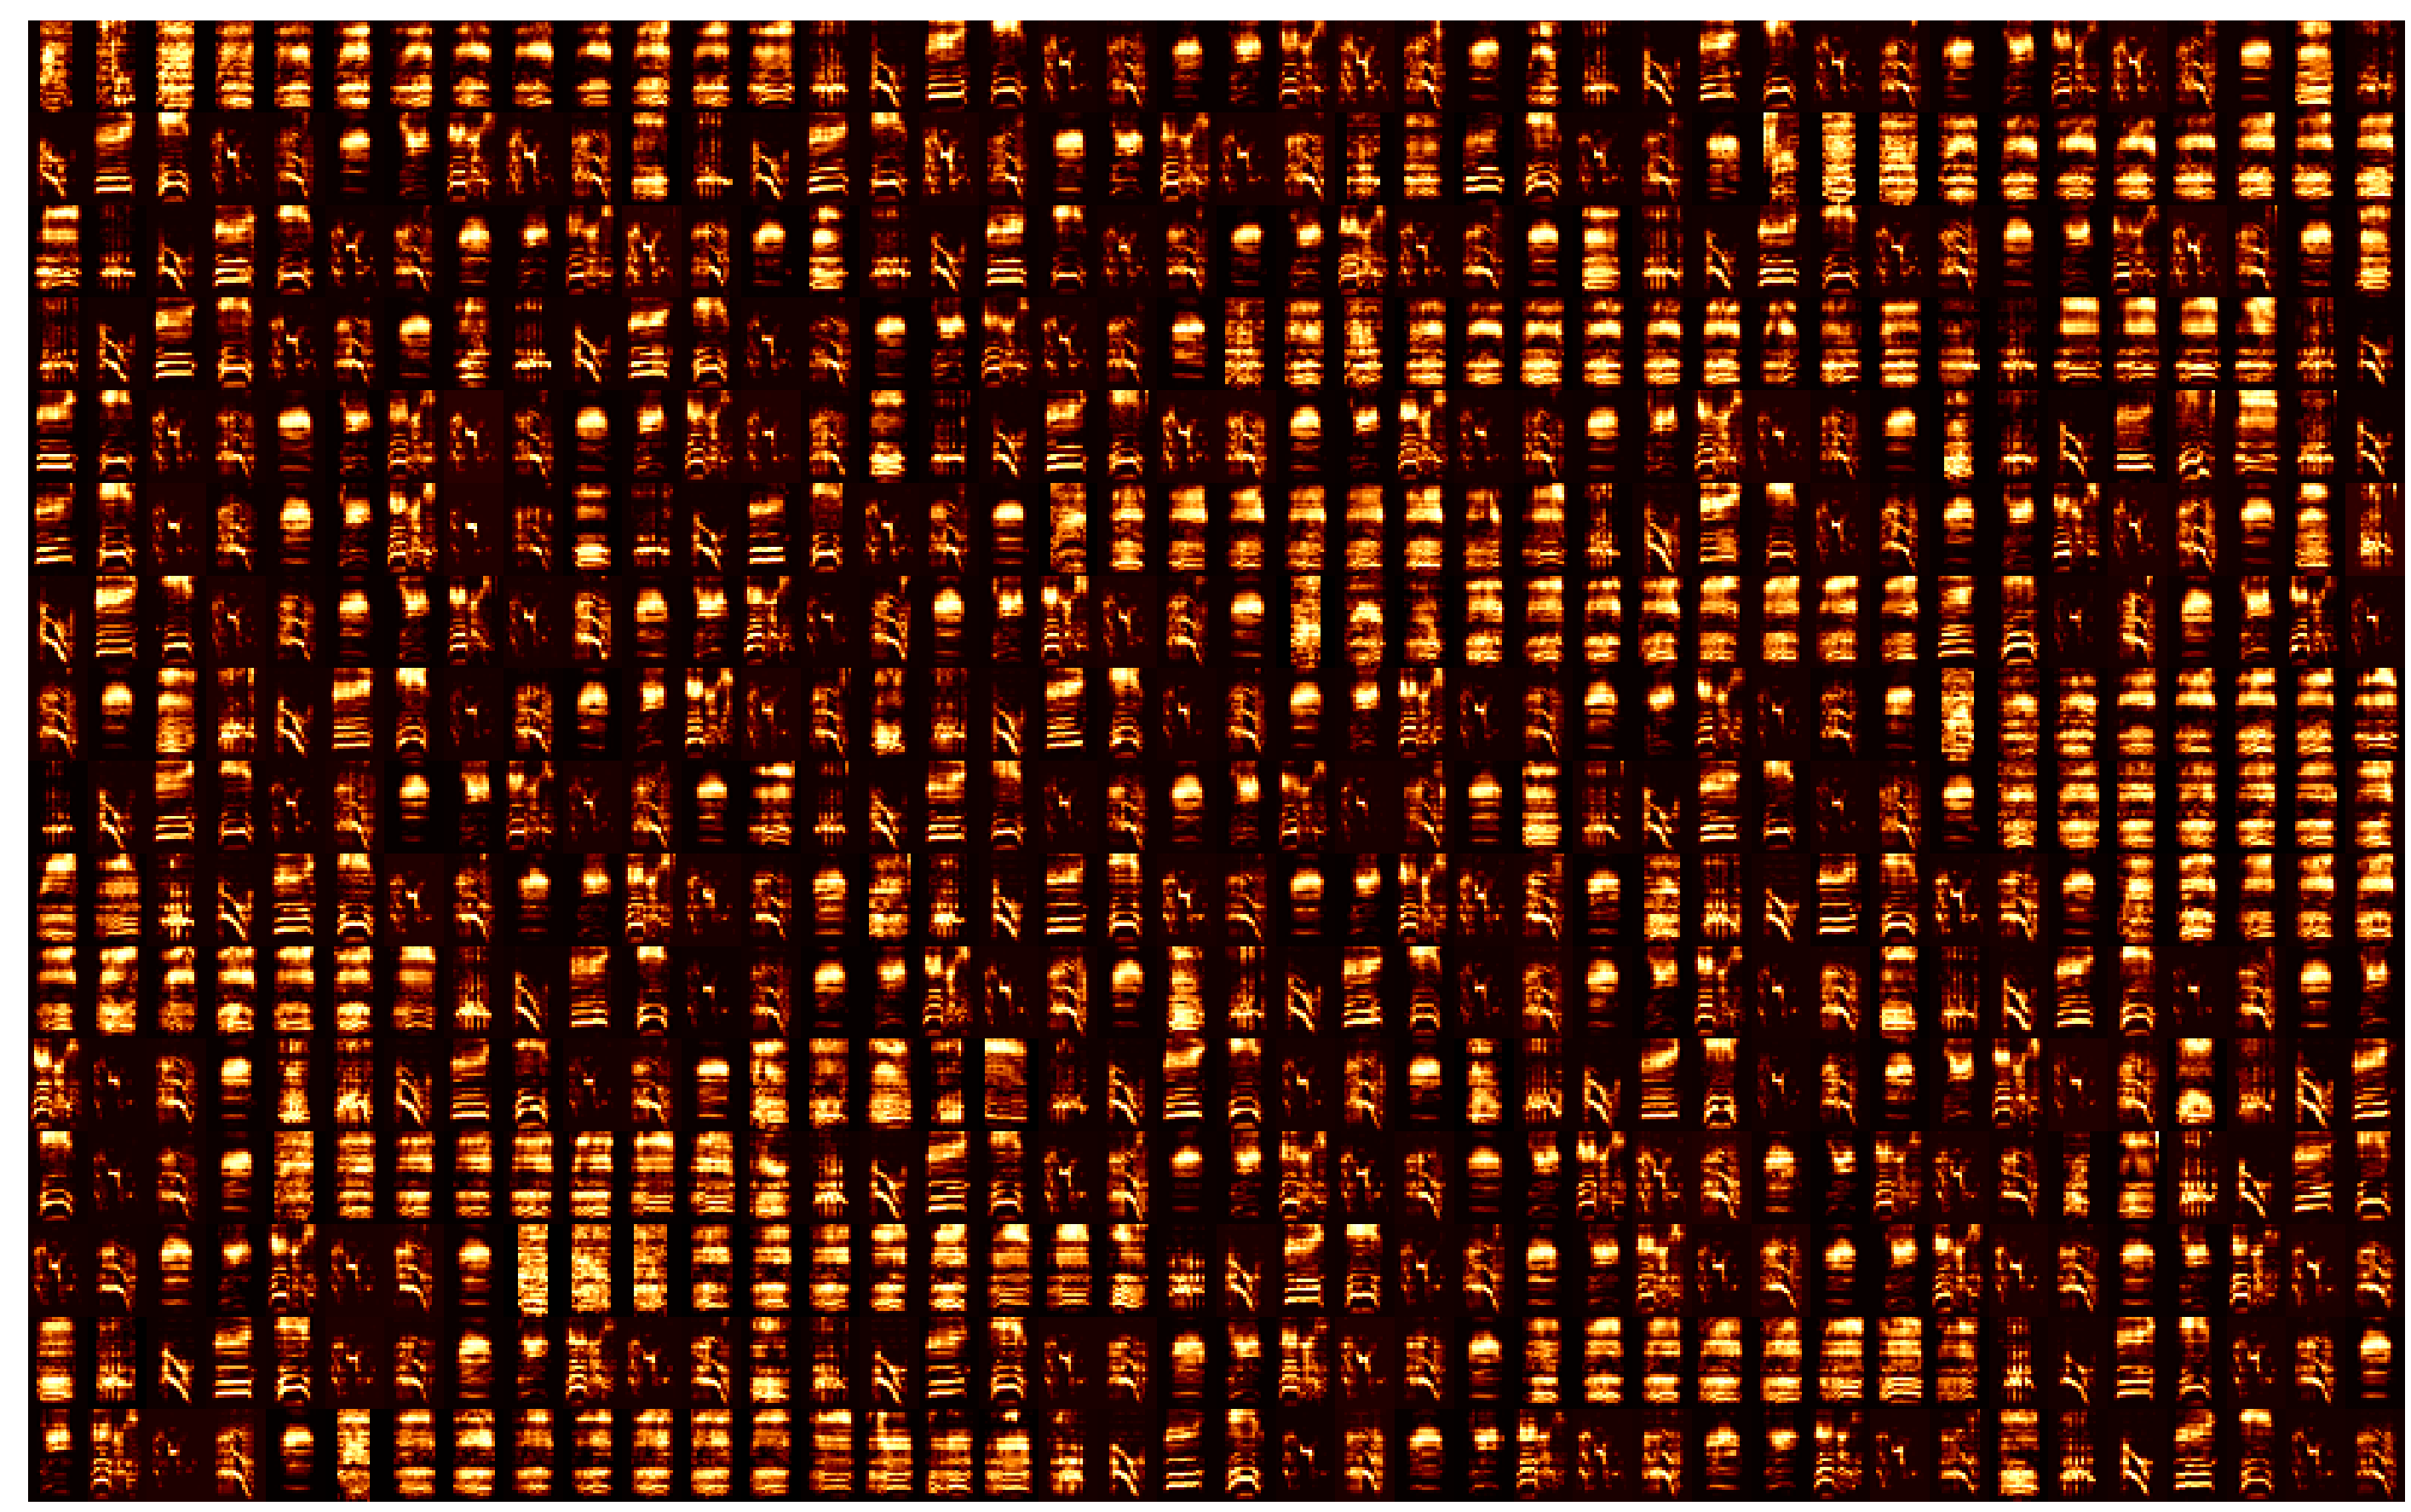

gy6or6 56375


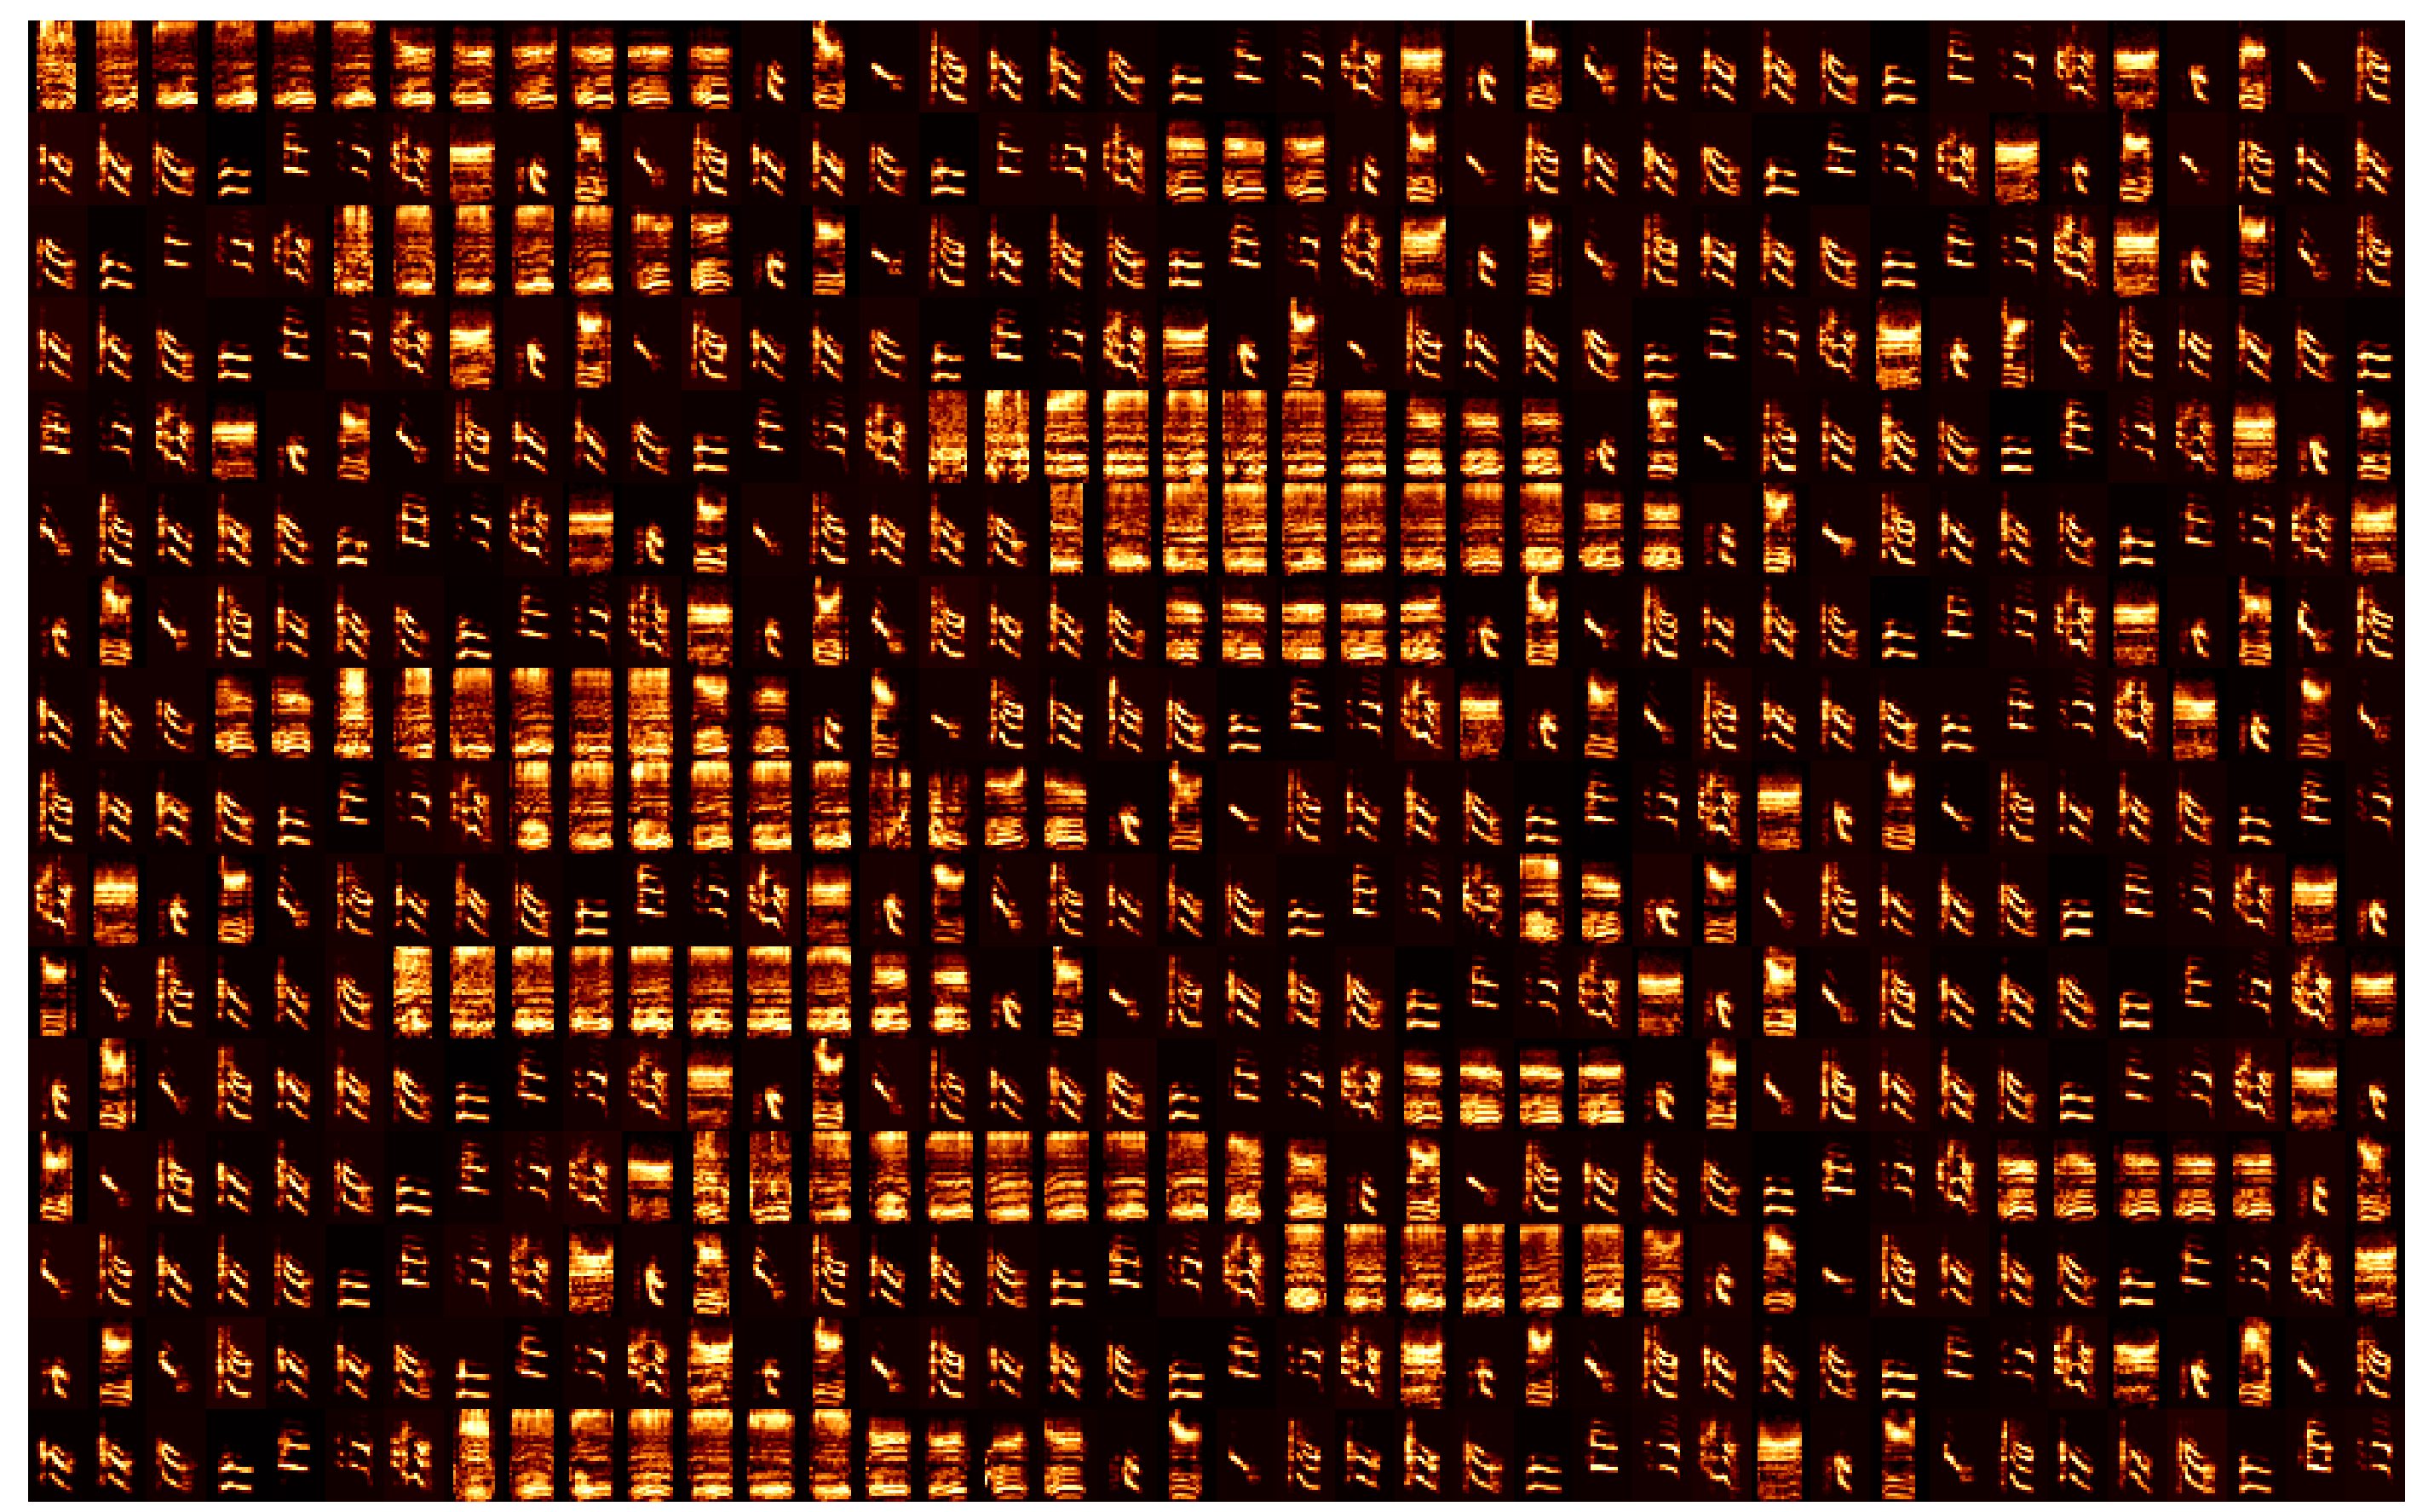

or60yw70 35799


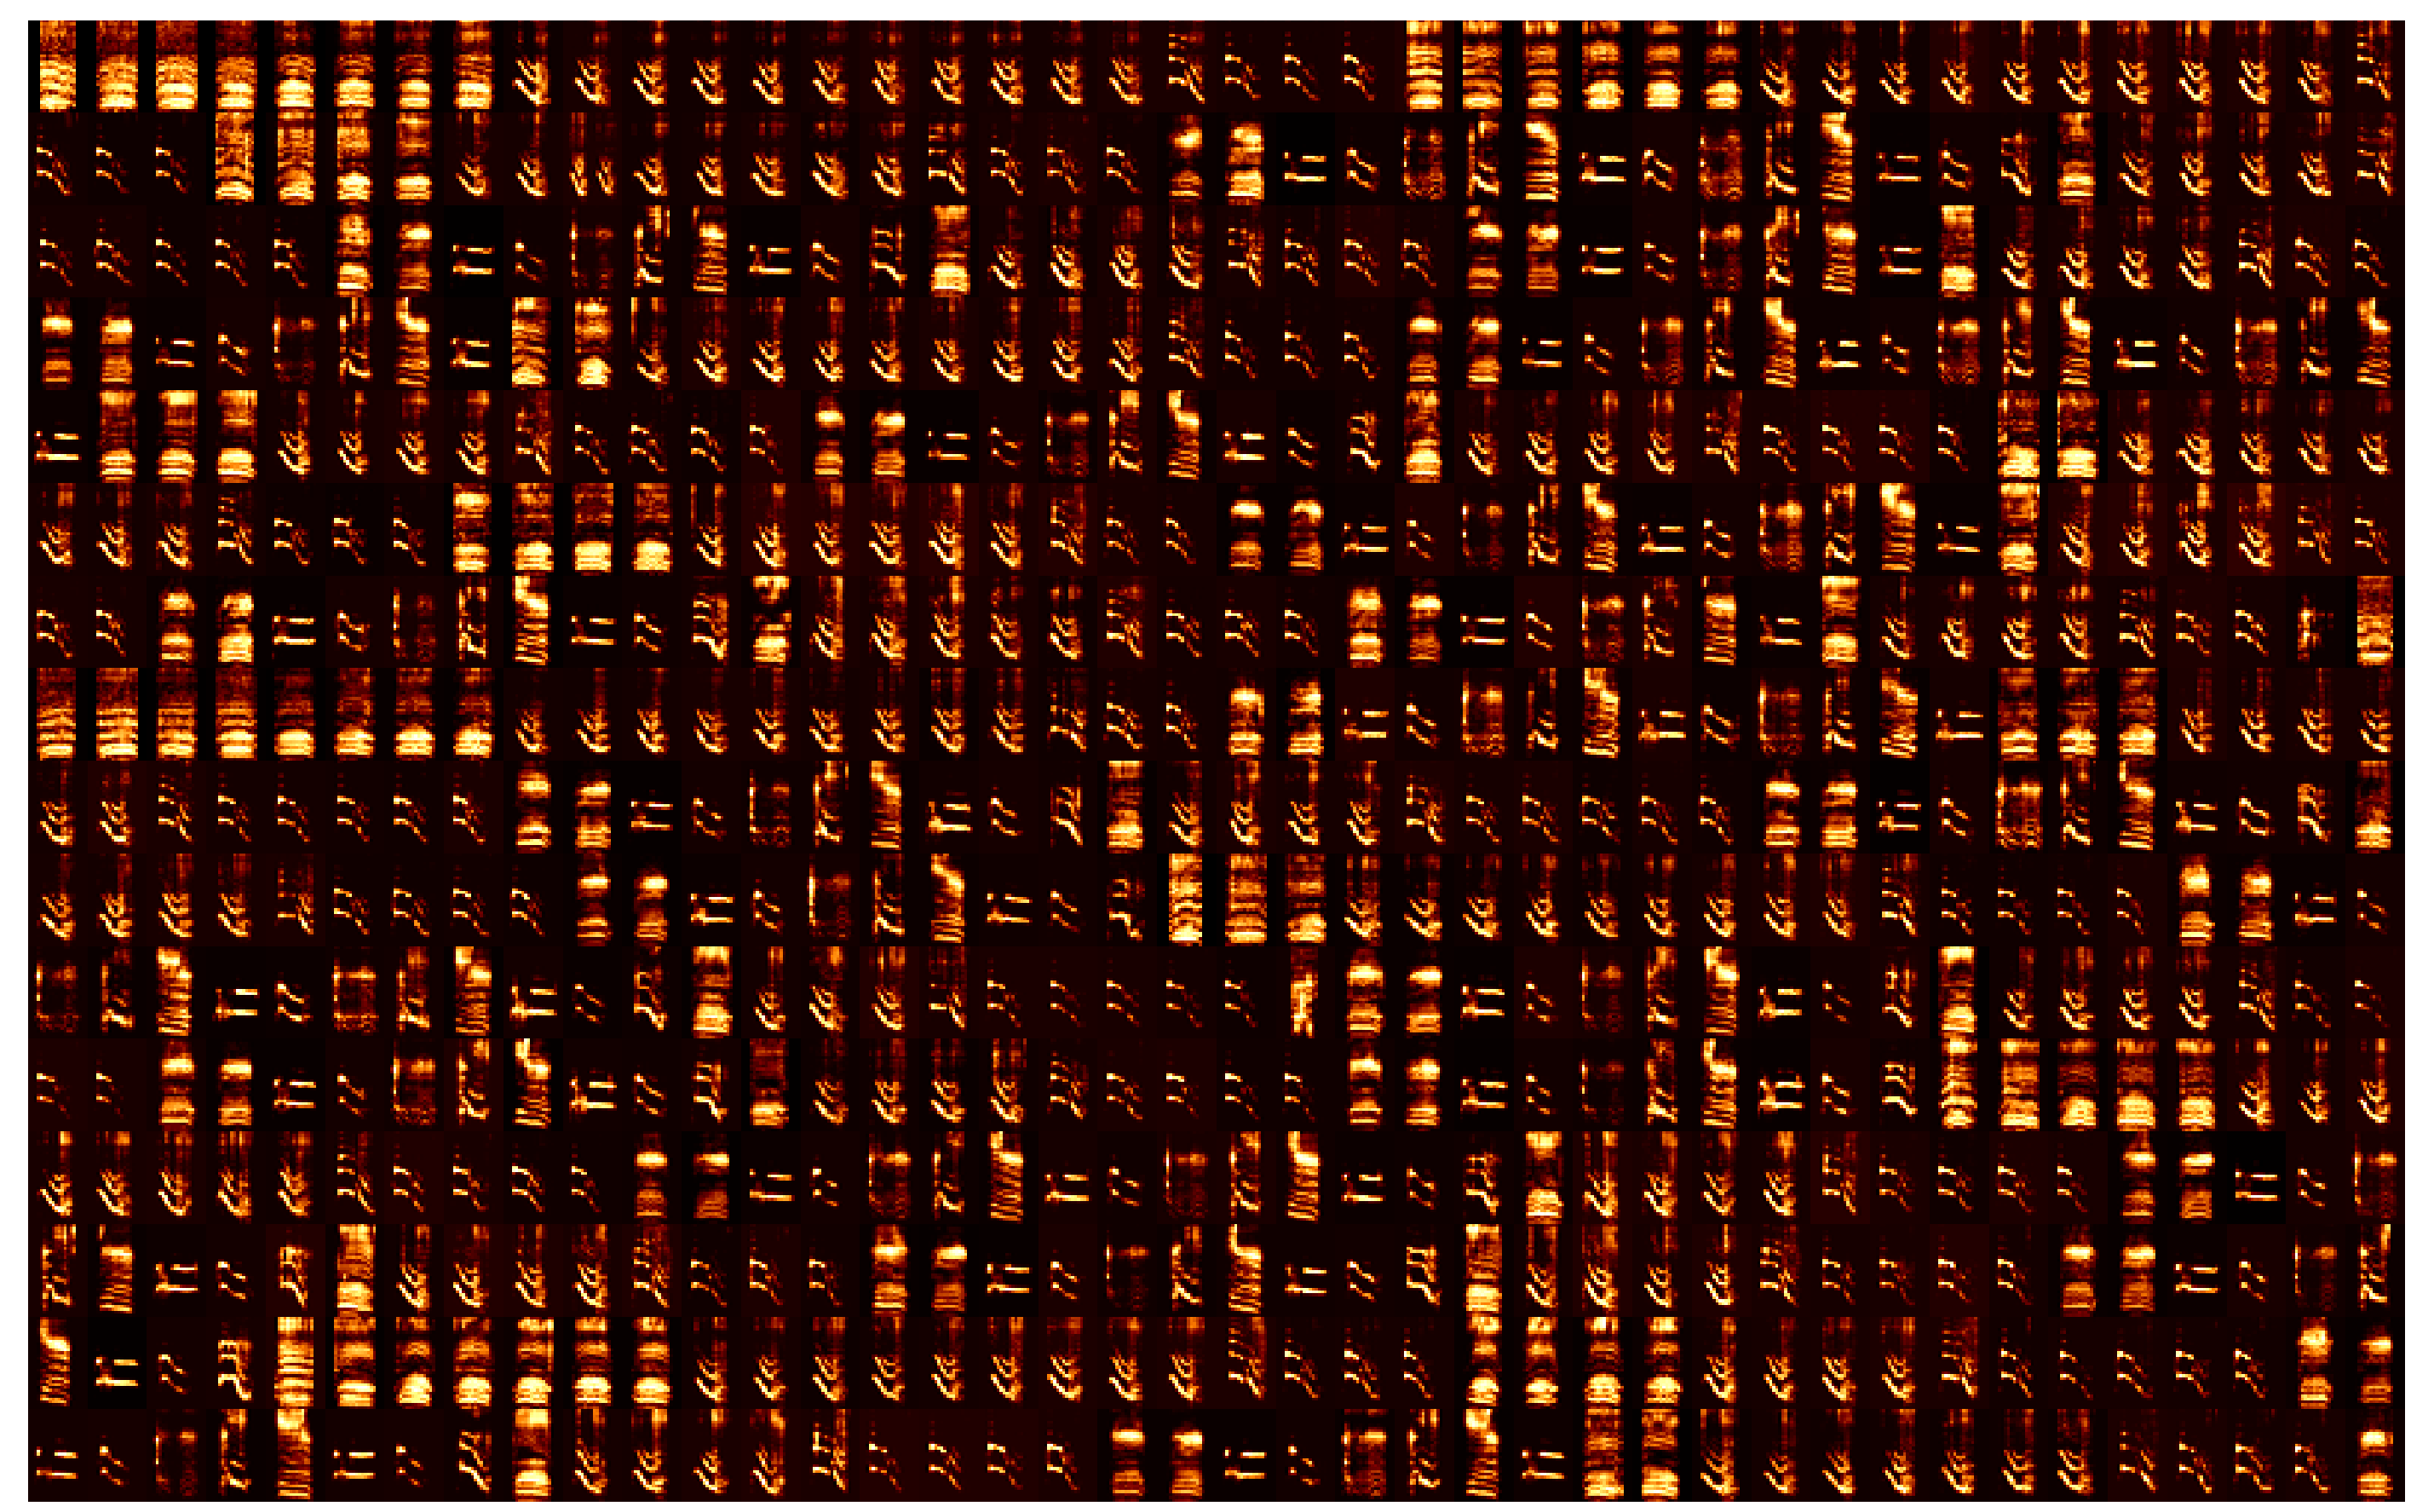

In [38]:
for indv in np.sort(syllable_df.indv.unique()):
    print(indv, np.sum(syllable_df.indv == indv))
    specs = np.array([i/np.max(i) for i in syllable_df[syllable_df.indv == indv].spectrogram.values])
    specs[specs<0] = 0
    draw_spec_set(specs, zoom=2,
                  maxrows=16, 
                  colsize=25)

### save dataset

In [39]:
save_loc = DATA_DIR / 'syllable_dfs' / DATASET_ID / 'bf-audio.pickle'
ensure_dir(save_loc)
syllable_df.to_pickle(save_loc)